In [66]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv


In [67]:
data = pd.read_csv('/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv',index_col='CustomerID')

In [68]:
data.describe()
print(data.columns)


Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')


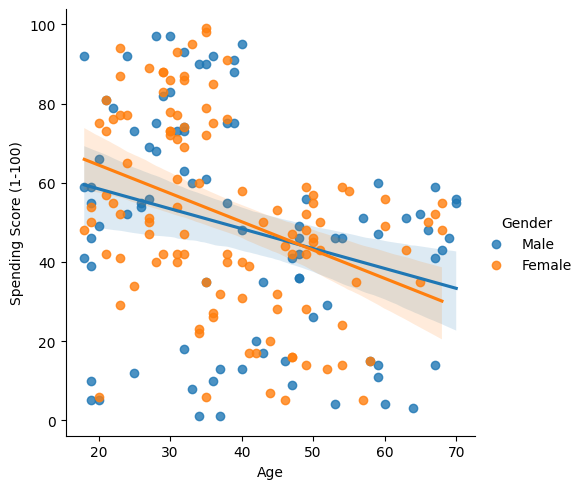

In [69]:
sns.lmplot(data=data, x='Age', y='Spending Score (1-100)',hue='Gender')

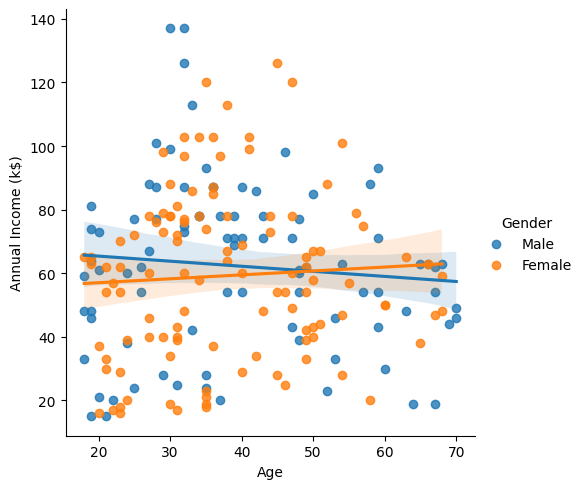

In [70]:
sns.lmplot(data=data, x='Age', y='Annual Income (k$)',hue='Gender')

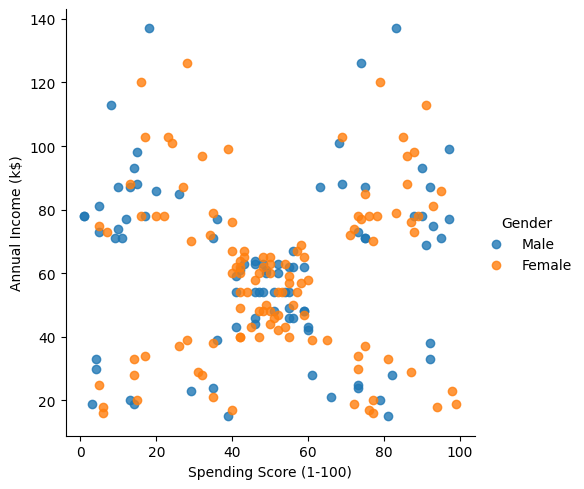

In [71]:
sns.lmplot(data=data, x='Spending Score (1-100)', y='Annual Income (k$)', hue='Gender', fit_reg=False)

In [72]:
from sklearn.preprocessing import MinMaxScaler

features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

scaler = MinMaxScaler()

data_scaled = scaler.fit_transform(data[features])

data_scaled = pd.DataFrame(data_scaled, columns=features)

print(data_scaled.head())


        Age  Annual Income (k$)  Spending Score (1-100)
0  0.019231            0.000000                0.387755
1  0.057692            0.000000                0.816327
2  0.038462            0.008197                0.051020
3  0.096154            0.008197                0.775510
4  0.250000            0.016393                0.397959


In [81]:
from sklearn.cluster import KMeans

k = 10

kmeans = KMeans(n_clusters=k, random_state=42)

kmeans.fit(data_scaled)

data['Cluster'] = kmeans.labels_
print(data.head())


            Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
CustomerID                                                            
1             Male   19                  15                      39   
2             Male   21                  15                      81   
3           Female   20                  16                       6   
4           Female   23                  16                      77   
5           Female   31                  17                      40   

                                             Customer Segment  Cluster  
CustomerID                                                              
1           Average Income, Average Spending Score, Age 18-35        8  
2                    Low Age, Low Income, High Spending Score        5  
3           Average Income, Average Spending Score, Age 18-35        8  
4                    Low Age, Low Income, High Spending Score        5  
5           Average Income, Average Spending Score, Age 18-35   

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



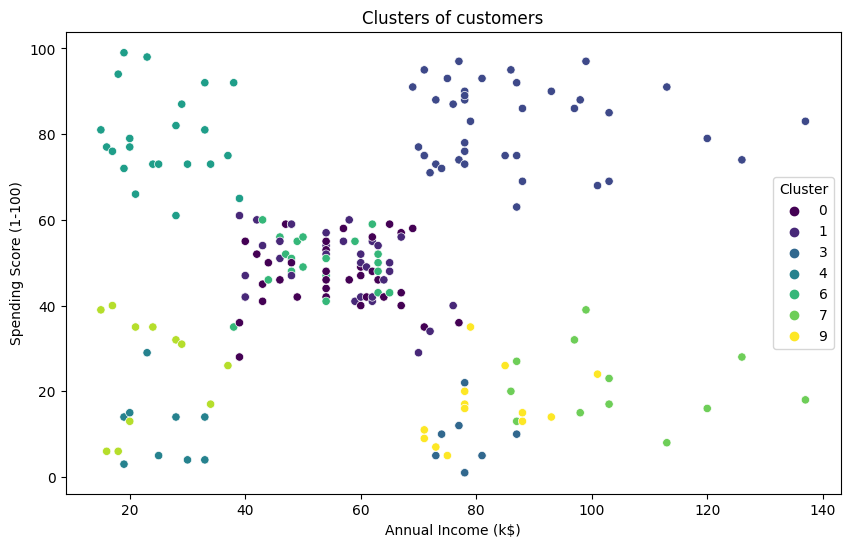

In [82]:
import matplotlib.pyplot as plt

# Plotting the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=data, hue='Cluster', palette='viridis')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()


In [83]:

fig = px.scatter_3d(data, x='Age', y='Annual Income (k$)', z='Spending Score (1-100)', color='Cluster',
                    symbol='Cluster', opacity=0.7, width=800, height=600,
                    title='Clusters of customers')

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

# Show the plot
fig.show()


/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

